<a href="https://colab.research.google.com/github/shubhangilore/fds/blob/main/fds_new_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Write and Read data, to and from a CSV file
import pandas as pd
eid = ['E101','E102','E103','E104']
fname = ['Shweta','Manisha','Madhu','Anita']
lname= ['Subnis','Perdesi','Mali','Rai']
deg =['ProjectEngineer','Tester','SeniorSoftwareEngineer','WebDeveloper']
bsal = [40000,50000,60000,70000]
edata = zip(eid,fname,lname,deg,bsal)
df = pd.DataFrame(data=edata, columns=['Employee Id','First Name','LastName','Designation','Basic_Salary'])
df.to_csv('edata.csv',index=None)
pdf = pd.read_csv('edata.csv',index_col=None)
print(pdf.to_string(index=False))

Employee Id First Name LastName             Designation  Basic_Salary
       E101     Shweta   Subnis         ProjectEngineer         40000
       E102    Manisha  Perdesi                  Tester         50000
       E103      Madhu     Mali  SeniorSoftwareEngineer         60000
       E104      Anita      Rai            WebDeveloper         70000


In [2]:
pip install xlsxwriter


     |████████████████████████████████| 153kB 5.8MB/s 


In [49]:
# Write and Read data, to and from an Excel file
import pandas as pd
import xlsxwriter
eid = ['E101','E102','E103','E104']
fname = ['Shweta','Manisha','Madhu','Anita']
lname= ['Subnis','Perdesi','Mali','Rai']
deg =['ProjectEngineer','Tester','SeniorSoftwareEngineer','WebDeveloper']
bsal = [40000,50000,60000,70000]
edata = zip(eid,fname,lname,deg,bsal)
df = pd.DataFrame(data=edata, columns=['Employee Id','First Name','LastName','Designation','Basic_Salary'])
writer = pd.ExcelWriter('edata.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet 1',index=False)
writer.save()
pdf = pd.read_excel('edata.xlsx',index_col=None)
print(pdf.to_string(index=False))


Employee Id First Name LastName             Designation  Basic_Salary
       E101     Shweta   Subnis         ProjectEngineer         40000
       E102    Manisha  Perdesi                  Tester         50000
       E103      Madhu     Mali  SeniorSoftwareEngineer         60000
       E104      Anita      Rai            WebDeveloper         70000


In [47]:
# Write and Read data, to and from SQL database
import pandas as pd
import sqlalchemy as sa
import os
import sqlite3 as lite
import warnings
eid = ['E101','E102','E103','E104']
fname = ['Shweta','Manisha','Madhu','Anita']
lname= ['Subnis','Perdesi','Mali','Rai']
deg =['ProjectEngineer','Tester','SeniorSoftwareEngineer','WebDeveloper']
bsal = [40000,50000,60000,70000]
edata = zip(eid,fname,lname,deg,bsal)
df = pd.DataFrame(data=edata, columns=['Employee Id','First Name','LastName','Designation','Basic_Salary'])
db_file = r'employeedb.db'
con = lite.connect(db_file)
df.to_sql('employee', con, schema=None, if_exists='replace',
index=True,
index_label=None, chunksize=None, dtype=None)
con.close()
engine = sa.create_engine(r"sqlite:///{}" .format(db_file))
sql = "select name from sqlite_master where type = 'table';"
df = pd.read_sql(sql, engine)
print(df.to_string(index=False),"\n")
sql = 'SELECT * from employee'
edf = pd.read_sql(sql, engine)
warnings.filterwarnings('ignore')
print(edf.to_string(index=False))

     name
 employee 

 index Employee Id First Name LastName             Designation  Basic_Salary
     0        E101     Shweta   Subnis         ProjectEngineer         40000
     1        E102    Manisha  Perdesi                  Tester         50000
     2        E103      Madhu     Mali  SeniorSoftwareEngineer         60000
     3        E104      Anita      Rai            WebDeveloper         70000


Data Preprocessing (Data Preparation and Data Transformations)

In [11]:
#Merge Functions
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],'value': [5, 6, 7, 8]})
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [30]:
#Missing Values
df.isnull()

,name
0,False


In [26]:
#Groupby fuction
df.groupby(['Designation']).mean()

,Basic Salary
Designation,
ProjectEngineer,40000
SeniorSoftwareEngineer,60000
Tester,50000
WebDeveloper,70000


In [27]:
#Spply Functions
import numpy as np
num = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
num.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [25]:
##Descriptive Statistics
print('Mean of salary',+df['Basic Salary'].mean())
print('Median of salary',+df['Basic Salary'].median())
print('Mode of salary',+df['Basic Salary'].mode())


Mean of salary 55000.0
Median of salary 55000.0
Mode of salary 0    40000
1    50000
2    60000
3    70000
dtype: int64


In [36]:
#Measures of Variability
print('SD of salary',+df['Basic Salary'].std())
print('Veriance of salary',+df['Basic Salary'].var())
print('Min salary:',df['Basic Salary'].min(),'Maximum value is:',df['Basic Salary'].max(
))


SD of salary 12909.944487358056
Veriance of salary 166666666.66666666
Min salary: 40000 Maximum value is: 70000


In [38]:
"""
Skewness and Kurtosis
Skewness is a measure of the symmetry of a distribution. The highest point of a distr
ibution is its mode.
Kurtosis is a statistical measure that defines how heavily the tails of a distributio
n differ from the tails of a normal distribution.
"""
import seaborn as sns
iris= sns.load_dataset("iris")
from scipy.stats import skew
from scipy.stats import kurtosis
sep_len_skew=skew(iris['sepal_length'])
print("The skewness of column age is : ",sep_len_skew)
#kurtosis
sep_len_kur=kurtosis(iris['sepal_length'])
print("The kurtosi of column age is : ",sep_len_kur)


The skewness of column age is :  0.3117530585022963
The kurtosi of column age is :  -0.5735679489249765


In [41]:
#Range
print("Range of basic salary", df['Basic Salary'].max()-df['Basic Salary'].min())

Range of basic salary 30000


In [43]:
#percentile
print("50th percentile of Basic_Salary column is:",np.percentile(df["Basic Salary"],50))
print("25th percentile of Basic_Salary column is:",np.percentile(df["Basic Salary"],25))
print("75th percentile of Basic_Salary column is:",np.percentile(df["Basic Salary"],75))

50th percentile of Basic_Salary column is: 55000.0
25th percentile of Basic_Salary column is: 47500.0
75th percentile of Basic_Salary column is: 62500.0


Quantile

In [45]:
print("Q2th quantile of Basic_Salary column is : ",np.quantile(df["Basic Salary"],.50))
print("Q1th quantile of Basic_Salary column is : ",np.quantile(df["Basic Salary"],.25))
print("Q3th quantile of Basic_Salary column is : ",np.quantile(df["Basic Salary"],.75))


Q2th quantile of Basic_Salary column is :  55000.0
Q1th quantile of Basic_Salary column is :  47500.0
Q3th quantile of Basic_Salary column is :  62500.0


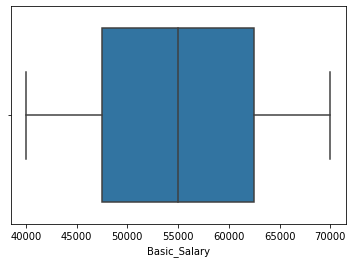

In [50]:
#Boxplot
sns.boxplot(df['Basic_Salary'])

##Exploratory Data Analysis
#Rectangular Data

In [54]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
values = randint(0, 10, 20)
print(values)


[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9]


Text(0, 0.5, 'Average')

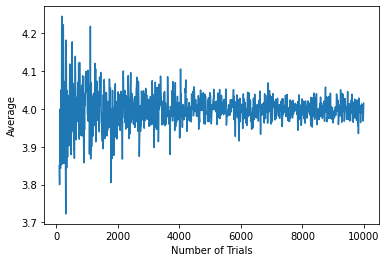

In [56]:
import matplotlib.pyplot as plt
import random
def random_variable_of_dice_roll():
  return random.randint(1, 7)
num_trials = range(100,10000, 10)
avgs = []
for num_trial in num_trials:
  trials = []
  for trial in range(1,num_trial):
    trials.append( random_variable_of_dice_roll())
  avgs.append(sum(trials)/float(num_trial))
plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel("Average")


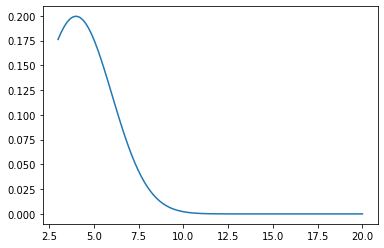

In [58]:
def normal_pdf(x, mu = 4, sigma = 2):
  return (1./np.sqrt(2*3.14 * sigma**2)) * 2.718**(-(x-mu)**2 / (2. * sigma**2))
x_values = np.linspace(3,20,100)
y_values = [normal_pdf(x) for x in x_values]
plt.plot(x_values, y_values)